
>Name: vijita nayak

>Roll no: 20232MCA0211



#DATA ANALYSIS AND PREPROCESSING

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from matplotlib.colors import ListedColormap
import sys

Reading dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
DATA='/content/drive/MyDrive/bs140513_032310.csv'
dataset=pd.read_csv(DATA)
dataset.head(8)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
5,0,'C1315400589','3','F','28007','M348934600','28007','es_transportation',25.81,0
6,0,'C765155274','1','F','28007','M348934600','28007','es_transportation',9.10,0
7,0,'C202531238','4','F','28007','M348934600','28007','es_transportation',21.17,0


In [4]:
S=dataset.shape
N=S[0]                          #N=no of  transactions
M=S[1]                          #M=no of features
print("The no of examples taken=",N)
print()
print("No of features used=",M)

The no of examples taken= 594643

No of features used= 10


search for missing

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [6]:
booldataset=dataset.isna()             #sets Nan values to bool
booldataset.any()                      #sum over columns
x=booldataset.any().sum()                #return no of nan values
print("No of Null values in given dataset =",x)


No of Null values in given dataset = 0


In [7]:
print(dataset)

        step       customer  age gender zipcodeOri       merchant zipMerchant  \
0          0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1          0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2          0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3          0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
4          0   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   
...      ...            ...  ...    ...        ...            ...         ...   
594638   179  'C1753498738'  '3'    'F'    '28007'  'M1823072687'     '28007'   
594639   179   'C650108285'  '4'    'F'    '28007'  'M1823072687'     '28007'   
594640   179   'C123623130'  '2'    'F'    '28007'   'M349281107'     '28007'   
594641   179  'C1499363341'  '5'    'M'    '28007'  'M1823072687'     '28007'   
594642   179   'C616528518'  '4'    'F'    '28007'  'M1823072687'     '28007'   

                   category

In [8]:
data_found_fraud = dataset.loc[dataset.fraud == 1]
data_non_fraud = dataset.loc[dataset.fraud == 0]
print("FRAUD")
print(data_found_fraud.head(4))
print("NOT FRAUD")
print(data_non_fraud.head(4))



FRAUD
     step       customer  age gender zipcodeOri      merchant zipMerchant  \
88      0   'C583110837'  '3'    'M'    '28007'  'M480139044'     '28007'   
89      0  'C1332295774'  '3'    'M'    '28007'  'M480139044'     '28007'   
434     0  'C1160421902'  '3'    'M'    '28007'  'M857378720'     '28007'   
435     0   'C966214713'  '3'    'M'    '28007'  'M857378720'     '28007'   

               category  amount  fraud  
88          'es_health'   44.26      1  
89          'es_health'  324.50      1  
434  'es_hotelservices'  176.32      1  
435  'es_hotelservices'  337.41      1  
NOT FRAUD
   step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2     0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3     0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   

            

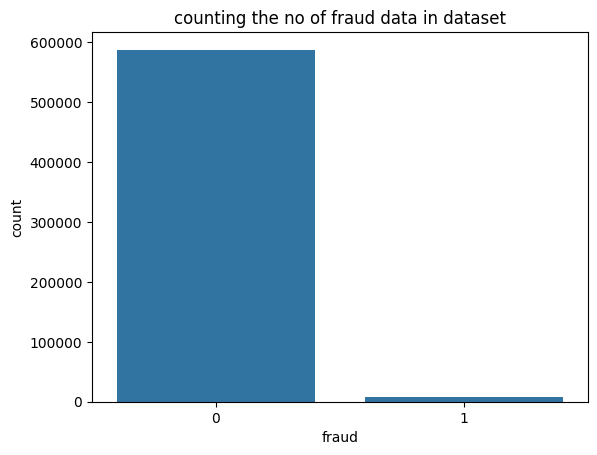

Number of  examples:  587443
Number of fradulent examples:  7200


In [9]:
#plotting fraud and non fraud data sets
sns.countplot(x="fraud",data=dataset)
plt.title("counting the no of fraud data in dataset")
plt.rcParams['figure.figsize'] = (6, 6)
plt.show()
#printing no of normal exmples vs the fradulent examples
print("Number of  examples: ",data_non_fraud.fraud.count())
print("Number of fradulent examples: ",data_found_fraud.fraud.count())

In [10]:
mean_category = dataset.groupby('category')[['amount', 'fraud']].mean() # Changed tuple to list
print("mean of features by category", mean_category)

mean of features by category                               amount     fraud
category                                      
'es_barsandrestaurants'    43.461014  0.018829
'es_contents'              44.547571  0.000000
'es_fashion'               65.666642  0.017973
'es_food'                  37.070405  0.000000
'es_health'               135.621367  0.105126
'es_home'                 165.670846  0.152064
'es_hotelservices'        205.614249  0.314220
'es_hyper'                 45.970421  0.045917
'es_leisure'              288.911303  0.949900
'es_otherservices'        135.881524  0.250000
'es_sportsandtoys'        215.715280  0.495252
'es_tech'                 120.947937  0.066667
'es_transportation'        26.958187  0.000000
'es_travel'              2250.409190  0.793956
'es_wellnessandbeauty'     65.511221  0.047594


In [11]:
mf=data_found_fraud.groupby('category')['amount'].mean()
mnf=data_non_fraud.groupby('category')['amount'].mean()
md=dataset.groupby('category')['fraud'].mean()*100
cmpframe=pd.concat([mf,mnf,md],keys=["fraud","non-fraud","percentage_fraud"],axis=1)
cmpframe.sort_values(by="non-fraud")


,fraud,non-fraud,percentage_fraud
category,,,
'es_transportation',NaN,26.958187,0.000000
'es_food',NaN,37.070405,0.000000
'es_hyper',169.255429,40.037145,4.591669
'es_barsandrestaurants',164.092667,41.145997,1.882944
'es_contents',NaN,44.547571,0.000000
'es_wellnessandbeauty',229.422535,57.320219,4.759380
'es_fashion',247.008190,62.347674,1.797335
'es_leisure',300.286878,73.230400,94.989980
'es_otherservices',316.469605,75.685497,25.000000


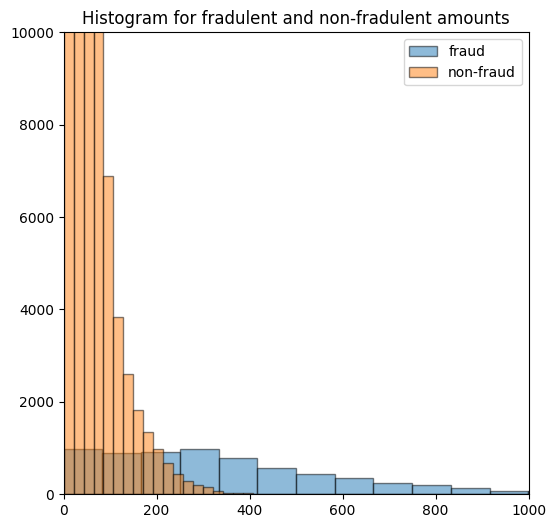

In [12]:
plt.hist(data_found_fraud.amount,alpha=0.5,label="fraud",bins=100,edgecolor="black")
plt.hist(data_non_fraud.amount,alpha=0.5,label="non-fraud",bins=100,edgecolor="black")
plt.xlim(0,1000)
plt.ylim(0,10000)

plt.title("Histogram for fradulent and non-fradulent amounts")
plt.legend()
plt.show()



In [13]:
age_fraud=dataset.groupby('age')['fraud'].mean()*100
age_fraud.reset_index().rename(columns={'age':'Age','fraud':'fraud-mean'})




,Age,fraud-mean
0,'0',1.957586
1,'1',1.185254
2,'2',1.251401
3,'3',1.192815
4,'4',1.293281
5,'5',1.095112
6,'6',0.974826
7,'U',0.594228



from the above analysis age below 18 i.e (0)th category has more chance of fraud occuring

# algorithms

In [14]:
dzip=dataset.zipcodeOri.nunique()
dmer=dataset.zipMerchant.nunique()

# erasing the zipCodeOri and zipMerchant values from the dataset"
dataset = dataset.drop(['zipcodeOri','zipMerchant'],axis=1)
print("Unique zipCodeOri values: ",dzip)
print("Unique zipMerchant values: ",dmer)

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


In [15]:
M=dataset.shape[1]
print(M)
dataset.head()

8


,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0


In [16]:
#changing datatype of object to categorical
col_cat=dataset.select_dtypes(include='object').columns
for i in col_cat:
  dataset[i]=dataset[i].astype('category')
#changing categorical values to numericals
dataset[col_cat]=dataset[col_cat].apply(lambda i:i.cat.codes)
dataset.head(5)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


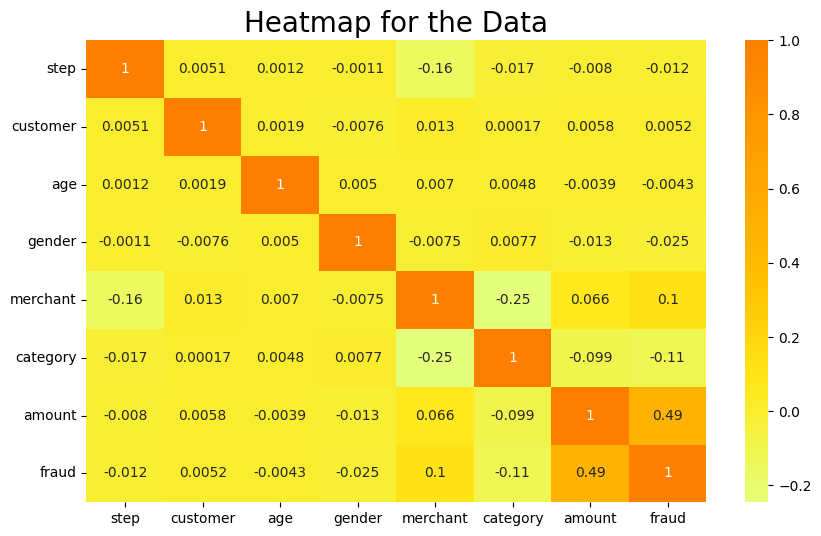

In [17]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.heatmap(dataset.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [18]:
x=dataset.drop(['fraud'],axis=1)
y=dataset['fraud']
print(x)
print()
print(y)

        step  customer  age  gender  merchant  category  amount
0          0       210    4       2        30        12    4.55
1          0      2753    2       2        30        12   39.68
2          0      2285    4       1        18        12   26.89
3          0      1650    3       2        30        12   17.25
4          0      3585    5       2        30        12   35.72
...      ...       ...  ...     ...       ...       ...     ...
594638   179      1639    3       1        18        12   20.53
594639   179      3369    4       1        18        12   50.73
594640   179       529    2       1        31         2   22.44
594641   179      1083    5       2        18        12   14.46
594642   179      3304    4       1        18        12   26.93

[594643 rows x 7 columns]

0         0
1         0
2         0
3         0
4         0
         ..
594638    0
594639    0
594640    0
594641    0
594642    0
Name: fraud, Length: 594643, dtype: int64


In [19]:
y[y==1].count()

np.int64(7200)

In [20]:
#changing datatype of object to categorical
col_cat=dataset.select_dtypes(include='object').columns
for i in col_cat:
  dataset[i]=dataset[i].astype('category').cat.codes # Added .cat.codes to directly convert to numerical codes
#changing categorical values to numericals
#dataset[col_cat]=dataset[col_cat].apply(lambda i:i.cat.codes) # This line is no longer needed
dataset.head(5)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_train_miss,
#y_train_miss ,test_size=0.3,random_state=42,
#shuffle=True,stratify=y_train_miss)

In [21]:
from imblearn.under_sampling import NearMiss # Importing NearMiss here as well
nr = NearMiss()

# Convert 'customer' column to numerical before applying NearMiss
x['customer'] = pd.to_numeric(x['customer'], errors='coerce')

# Ensure all columns are numerical and handle NaN:
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = pd.to_numeric(x[col], errors='coerce')
    # Fill NaN with a suitable value (e.g., -1, 0, or the mean)
    x[col] = x[col].fillna(-1).astype('int64') # Filling NaN with -1 before conversion

X_train_miss, y_train_miss = nr.fit_resample(x, y)  # changed fit_sample to fit_resample
print('the shape of train_X: {}'.format(X_train_miss.shape))
print('the shape of train_y: {} \n'.format(y_train_miss.shape))
print("counts of label '1': {}".format(sum(y_train_miss == 1)))
print("counts of label '0': {}".format(sum(y_train_miss == 0)))


the shape of train_X: (14400, 7)
the shape of train_y: (14400,) 

counts of label '1': 7200
counts of label '0': 7200


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_train_miss,
                                                    y_train_miss,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y_train_miss)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Create and train the classifier
classifier = LogisticRegression(random_state=0, max_iter=1000)  # Increased max_iter
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate and print confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100

print("the confusion matrix is =")
print(cm)
print("accuracy per=", accuracy)


the confusion matrix is =
[[2069   91]
 [ 295 1865]]
accuracy per= 91.06481481481481


In [28]:
 from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier

knn_cls=KNeighborsClassifier(n_neighbors=5,p=2)
knn_cls.fit(X_train,y_train)
y_pred=knn_cls.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [29]:
knn_cls=KNeighborsClassifier(n_neighbors=5,p=2)
knn_cls.fit(X_train,y_train)
y_pred=knn_cls.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_cls = KNeighborsClassifier(n_neighbors=5, p=2)
knn_cls.fit(X_train, y_train)
y_pred = knn_cls.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)

Accuracy: 92.80092592592592


In [32]:

from sklearn.tree import DecisionTreeClassifier


classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("accuracy per=",accuracy_score(y_test,y_pred)*100)

[[2059  101]
 [  83 2077]]
accuracy per= 95.74074074074073


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,
        max_depth=8,random_state=42,verbose=1,
                     class_weight="balanced")
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("the confusion matrix is =")
print(cm)
print("accuracy per=",accuracy_score(y_test,y_pred)*100)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


the confusion matrix is =
[[2059  101]
 [  83 2077]]
accuracy per= 96.66666666666667


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [35]:
# Check for missing or invalid values
print(df.isnull().sum())

NameError: name 'df' is not defined

In [38]:
# Drop rows with missing values
dataset = dataset.dropna()

In [40]:
print(dataset[['gender', 'category']].head())

   gender  category
0       2        12
1       2        12
2       1        12
3       2        12
4       2        12


In [42]:
# Check if any columns have non-numeric values
print(dataset.select_dtypes(include=['object']).columns)

Index([], dtype='object')


In [44]:
# Force conversion of the dataframe 'x' to numeric, setting errors to NaN
x = x.apply(pd.to_numeric, errors='coerce')

In [47]:
x=dataset.drop(['fraud'],axis=1)
y=dataset['fraud']

In [48]:
X_train_miss, y_train_miss = nr.fit_resample(x, y)

In [50]:
print(X_train_miss.shape)
print(y_train_miss.shape)

(14400, 7)
(14400,)


In [52]:
# Drop rows in `dataset` where `y` has missing values (assuming y comes from the 'fraud' column of dataset)
dataset = dataset.dropna(subset=['fraud'])
X = dataset.drop(columns=['fraud'])
y = dataset['fraud']

after cleanning

In [53]:
print(X.shape)
print(y.shape)


(594643, 7)
(594643,)


In [54]:
# Check for non-numeric columns in X
print(X.select_dtypes(include=['object']).columns)


Index([], dtype='object')


In [55]:
# Convert non-numeric columns to numeric, coercing errors (which turns non-numeric into NaN)
X = X.apply(pd.to_numeric, errors='coerce')


In [56]:
# Drop rows with NaN values
X = X.dropna()
y = y[X.index]  # Ensure `y` is aligned with `X`


In [58]:
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

le = LabelEncoder()
for col in ['gender', 'category']:
    X[col] = le.fit_transform(X[col])

In [59]:
print(X.dtypes)


step          int64
customer      int16
age            int8
gender        int64
merchant       int8
category      int64
amount      float64
dtype: object


In [60]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [65]:
 #Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# -----------------------
# ✅ Batch Prediction
# -----------------------
predictions = model.predict(X_test)
output_labels = ["Yes" if pred == 1 else "No" for pred in predictions]
print("Sample batch predictions (Yes = Fraud, No = Not Fraud):")
print(output_labels[:20])  # Show first 20

# -----------------------
# 🧾 Single Transaction Prediction

# Create sample input with all expected features
sample_input = pd.DataFrame([{
    'step': 100,
    'customer': 0,     # Add a dummy or representative value for 'customer'
    'category': 2,     # Number from label encoding
    'amount': 150.0,
    'gender': 1,       # 0 = F, 1 = M
    'age': 3,
    'merchant': 0      # Add a dummy or representative value for 'merchant'
}])

# Ensure the columns are in the same order as the training data X_scaled
# Get the column names from X_resampled which was used to fit the scaler
expected_columns = X_resampled.columns.tolist() # Get the actual column order from X_resampled
sample_input = sample_input[expected_columns]


# Scaling the input
sample_input_scaled = scaler.transform(sample_input)

# Prediction
single_pred = model.predict(sample_input_scaled)[0]
result = "Yes" if single_pred == 1 else "No"
print(f"\nIs the single transaction fraudulent? {result}")

Sample batch predictions (Yes = Fraud, No = Not Fraud):
['No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No']

Is the single transaction fraudulent? No


In [64]:
# -----------------------
# 🧾 Single Transaction Prediction

# Create sample input with all expected features
sample_input = pd.DataFrame([{
    'step': 100,
    'customer': 0,     # Add a dummy or representative value for 'customer'
    'category': 2,     # Number from label encoding
    'amount': 150.0,
    'gender': 1,       # 0 = F, 1 = M
    'age': 3,
    'merchant': 0      # Add a dummy or representative value for 'merchant'
}])

# Ensure the columns are in the same order as the training data X_scaled
# Get the column names from X_resampled which was used to fit the scaler
expected_columns = X_resampled.columns.tolist() # Get the actual column order from X_resampled
sample_input = sample_input[expected_columns]


# Scaling the input
sample_input_scaled = scaler.transform(sample_input)

# Prediction
single_pred = model.predict(sample_input_scaled)[0]
result = "Yes" if single_pred == 1 else "No"
print(f"\nIs the single transaction fraudulent? {result}")


Is the single transaction fraudulent? No
